## ----- Import Required Libraries -----

In [ ]:
import pandas as pd                     # For data handling and manipulation
import numpy as np                      # For numerical operations
import matplotlib.pyplot as plt         # For visualization
import seaborn as sns                   # For advanced data visualization

## ----- Load the Dataset -----

In [ ]:
dataset = pd.read_csv('Fish.csv') # Load the Fish dataset from CSV file
dataset.head() # Display the first 5 rows

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## ----- Check for Missing Values -----

In [ ]:
dataset.isnull().sum() # Count null values in each column


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

# ----- Encode Categorical Data (Species) -----

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
# Convert species names to numeric values
dataset['Species'] = lb.fit_transform(dataset['Species'])  

### ----- Display Correlation of Features with Target (Weight) -----

In [ ]:
# Show how strongly each feature correlates with 'Weight'
dataset.corr()["Weight"]           


Species   -0.312960
Weight     1.000000
Length1    0.915712
Length2    0.918618
Length3    0.923044
Height     0.724345
Width      0.886507
Name: Weight, dtype: float64

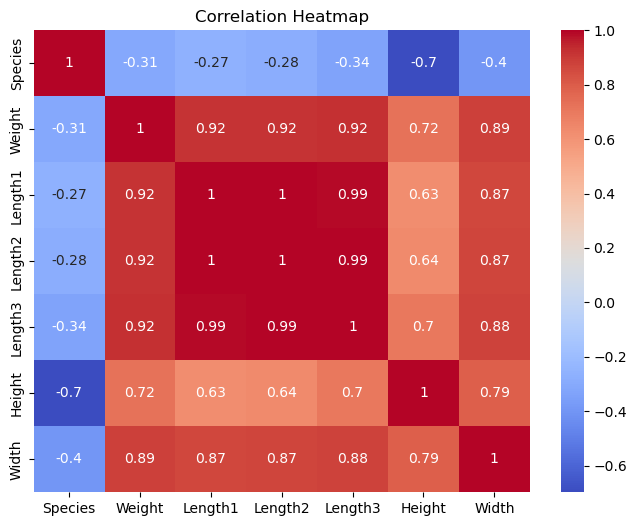

In [12]:
# ----- Correlation Heatmap -----
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

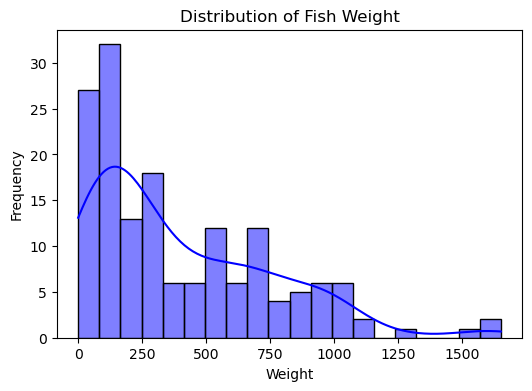

In [13]:
# ----- Distribution of Weight -----
plt.figure(figsize=(6,4))
sns.histplot(dataset["Weight"], bins=20, kde=True, color="blue")
plt.title("Distribution of Fish Weight")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()

C:\Users\arbaz\AppData\Local\Temp\ipykernel_3128\2385687224.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x="Species", palette="viridis")


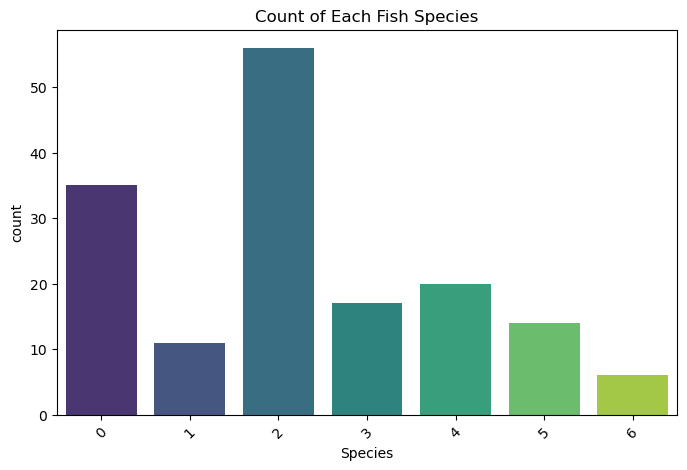

In [14]:
# ----- Species Count -----
plt.figure(figsize=(8,5))
sns.countplot(data=dataset, x="Species", palette="viridis")
plt.title("Count of Each Fish Species")
plt.xticks(rotation=45)
plt.show()


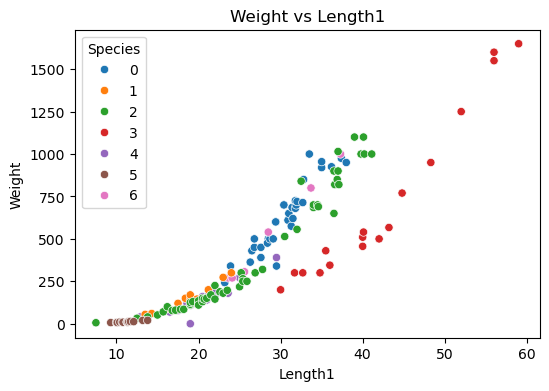

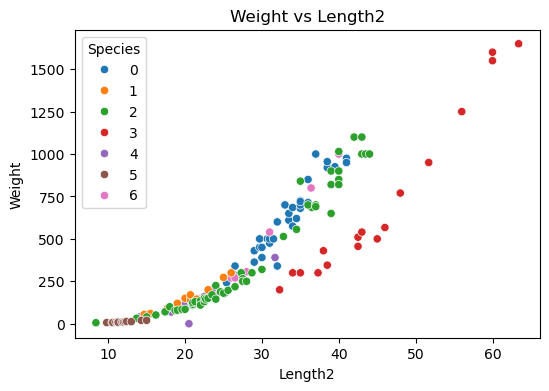

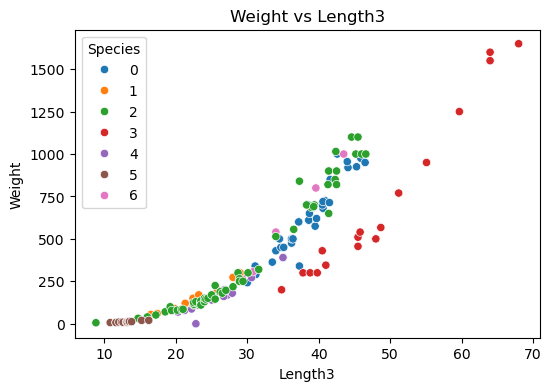

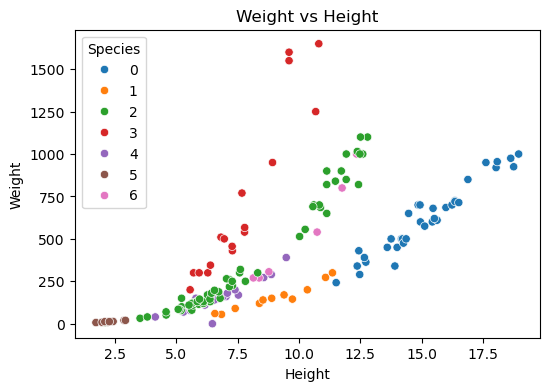

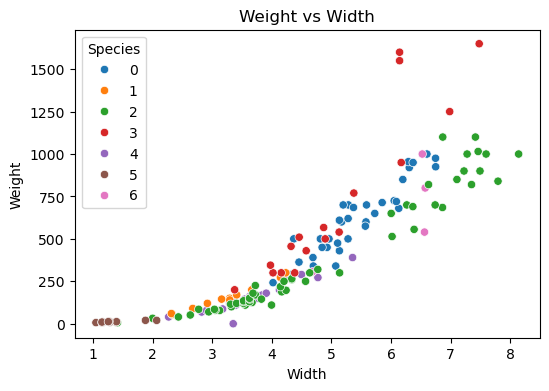

In [15]:
# ----- Relationship Between Features and Weight -----
num_cols = ["Length1", "Length2", "Length3", "Height", "Width"]
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=dataset, x=col, y="Weight", hue="Species", palette="tab10")
    plt.title(f"Weight vs {col}")
    plt.show()


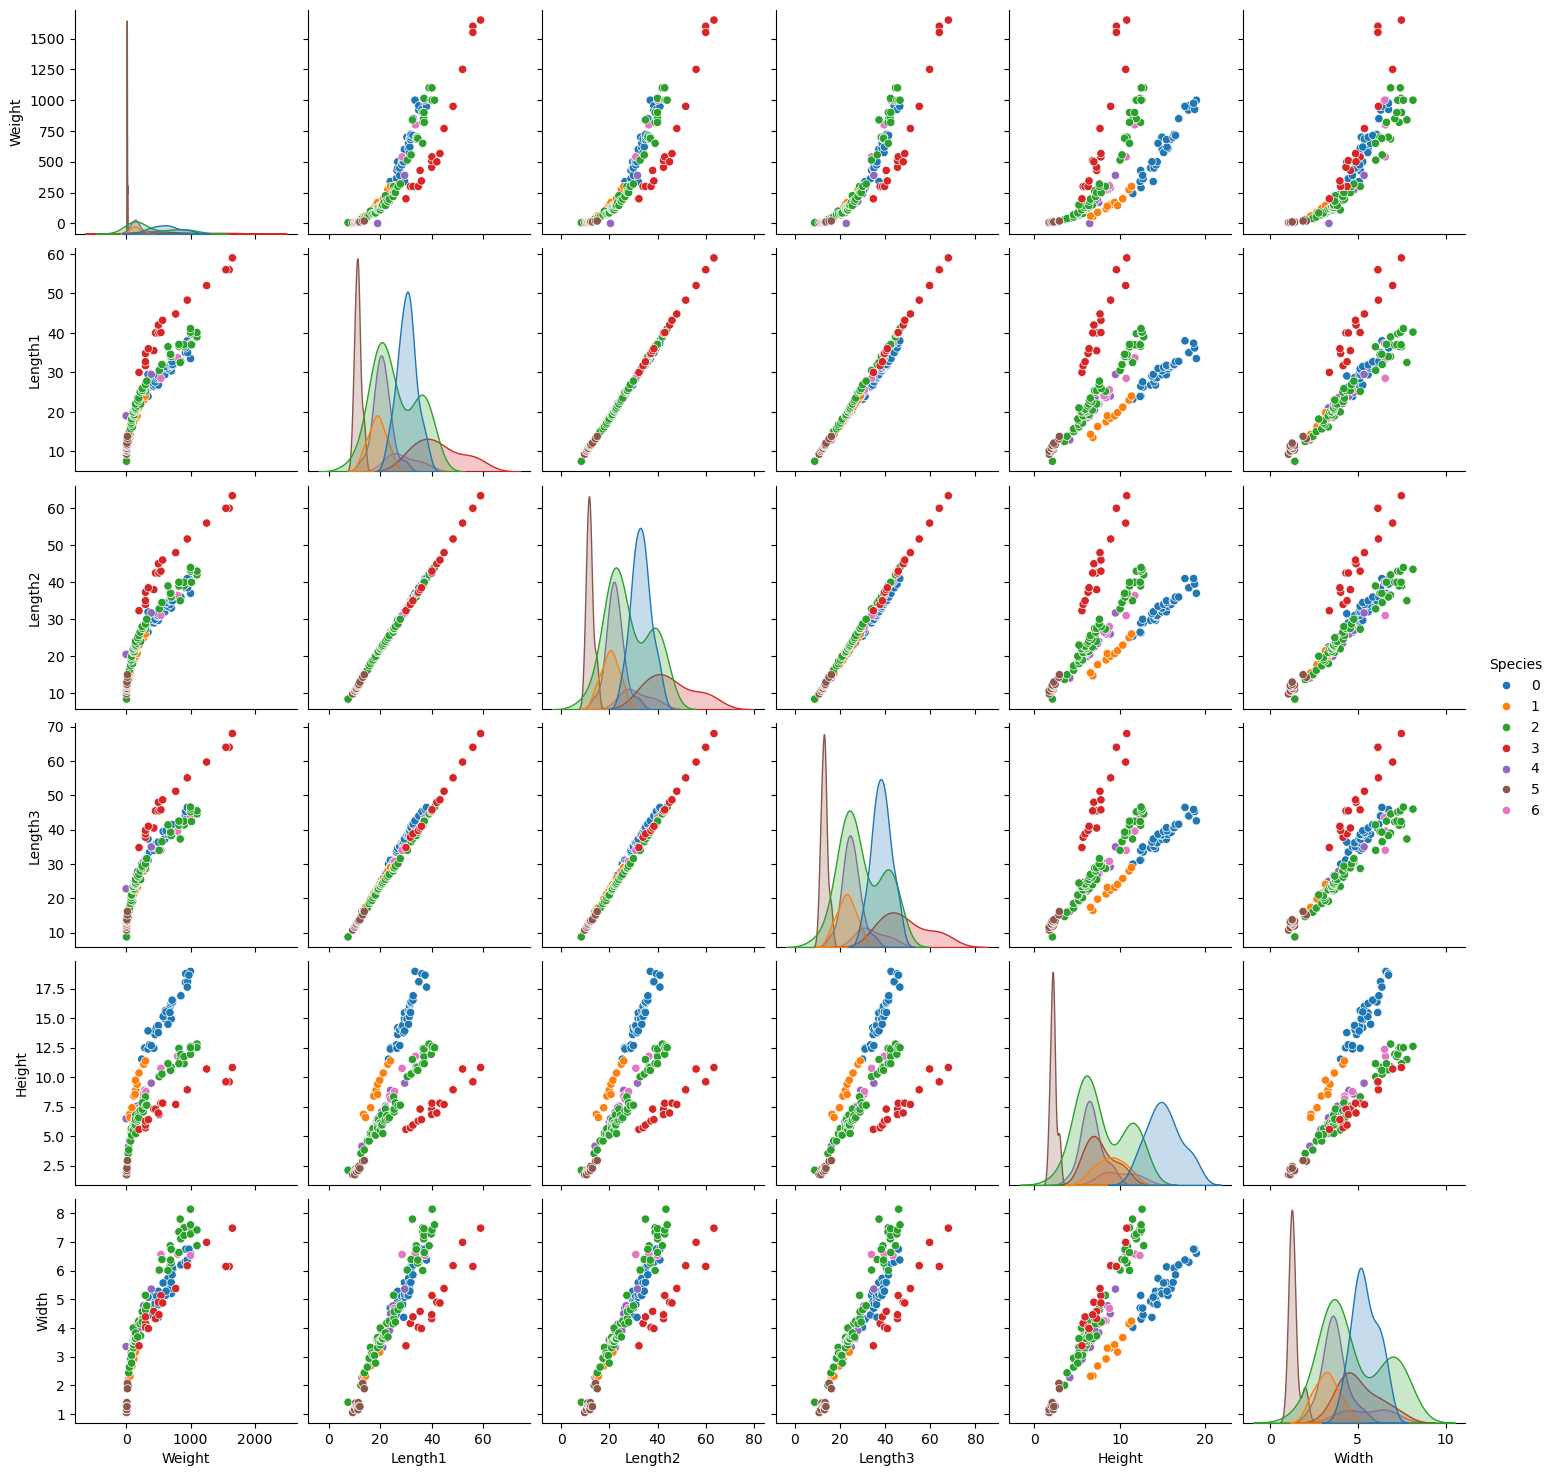

In [16]:
# ----- Pairplot (numerical only) -----
sns.pairplot(dataset, vars=["Weight", "Length1", "Length2", "Length3", "Height", "Width"], hue="Species", palette="tab10")
plt.show()

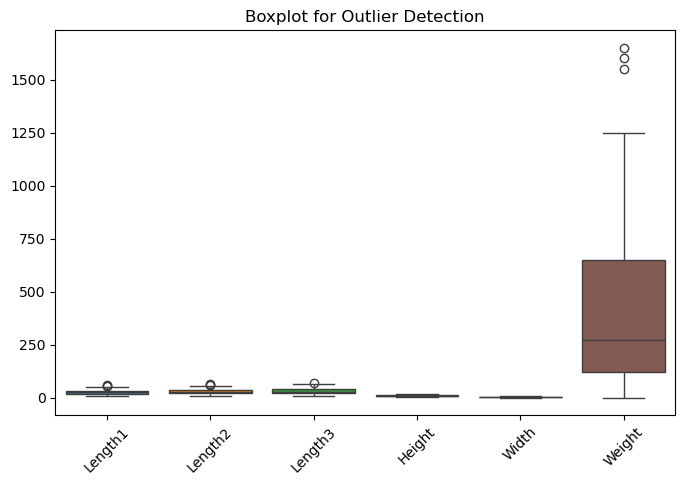

In [17]:
# ----- Outlier Detection -----
plt.figure(figsize=(8,5))
sns.boxplot(data=dataset[num_cols + ["Weight"]])
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

## ----- Feature and Target Separation -----


In [ ]:
X = dataset.drop(['Species','Weight'], axis=1)  # Independent variables
y = dataset['Weight']                           # Dependent variable (target)

## ----- Train-Test Split -----

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## ----- Feature Scaling -----

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
# Scale input features and target values
X = sc_X.fit_transform(X_train)
y = sc_y.fit_transform(y_train.values.reshape(-1, 1))

## ----- Train the Support Vector Regression (SVR) Model -----


In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')           # Using Radial Basis Function kernel
regressor.fit(X, y.ravel())             # Train the SVR model

SVR()

## ----- Make Predictions -----


In [ ]:
y_pred_scaled = regressor.predict(sc_X.transform(X_test))   # Predict on test set (scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))  # Convert predictions back to original scale

print(y_pred[:10])  # Display first 10 predicted weights

[[  89.74520473]
 [  37.72318582]
 [ 277.56439387]
 [ 227.7559733 ]
 [ 166.74222091]
 [ 856.56825199]
 [  55.52929852]
 [ 198.71132692]
 [ 207.82550704]
 [1377.20178052]]


## ----- Compare Actual vs Predicted Values -----


In [23]:
import pandas as pd

results = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicted': y_pred.flatten()
})

print(results.head(10))


   Actual    Predicted
0    78.0    89.745205
1    13.4    37.723186
2   200.0   277.564394
3   270.0   227.755973
4   150.0   166.742221
5  1000.0   856.568252
6     7.0    55.529299
7   180.0   198.711327
8   188.0   207.825507
9  1250.0  1377.201781


## ----- Plot Actual vs Predicted Weights -----


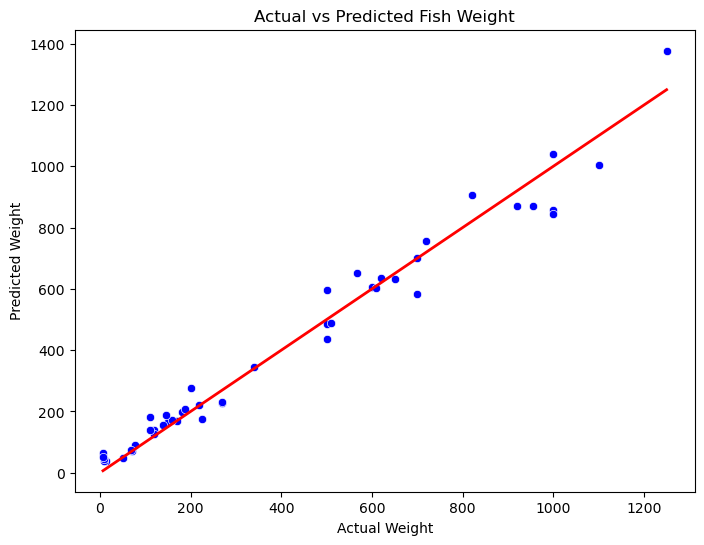

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=results['Actual'], y=results['Predicted'], color='blue')
plt.plot([results['Actual'].min(), results['Actual'].max()],
         [results['Actual'].min(), results['Actual'].max()],
         color='red', linewidth=2)  # Diagonal line for perfect prediction
plt.title("Actual vs Predicted Fish Weight")
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.show()